<a href="https://colab.research.google.com/github/jlpaniagua/FundamentalsAI/blob/master/IntroKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Introduccion a Keras**##

![alt text](https://miro.medium.com/max/600/0*LZQf7b4u8f97izwV.png)

Keras es un framework de aprendizaje profundo para Python que proporciona una forma conveniente de definir y entrenar casi cualquier tipo de modelo de aprendizaje profundo. Keras es una API de redes neuronales de alto nivel, escrita en Python que es capaz de ejecutarse sobre Tensorflow, Theano y CNTK. Fue desarrollado para permitir la experimentación rápida.

Keras es compatible con versiones de Python desde 2.x a 3.x hasta la fecha.

Keras es utilizado por alrededor de 200,000 usuarios, desde investigadores académicos e ingenieros en empresas nuevas y grandes, hasta estudiantes graduados y aficionados. Keras se utiliza en Google, Netflix, Uber, Microsoft, Square y muchas empresas nuevas que trabajan con gran variedad de problemas de aprendizaje automático.

![alt text](https://miro.medium.com/max/407/1*YFYQs2NBiUid4NH22LgJQA.png)


* Keras no maneja operaciones de bajo nivel como manipulaciones y diferenciación de tensores. 

* Se basa en una biblioteca de tensor especializada y bien optimizada, que sirve como motor de back-end de Keras. 

* Actualmente existen tres implementaciones de back-end, el backend Tensorflow, el backend Theano y el backend de Microsoft Cognitive Toolkit (CNTK).

![alt text](https://miro.medium.com/max/231/1*t_xCCZb4XCzzDn9LSeOQpw.png)

**Workflow en Keras:**



* Definir los datos de entrenamiento: tensor de entrada y tensor de salida (objetivo).
*  Definir la red (o modelo).
* Configurar el proceso de aprendizaje eligiendo una función de pérdida, un optimizador y algunas métricas para monitorear.
* Realizar el entrenamiento llamando al método fit () de su modelo.





##**Formas de Definir un modelo en Keras**##

* **Sequential Class:** Linear Stack of layers

In [0]:
from keras import models
from keras import layers
from keras import optimizers
import numpy as np

#install TensorFlow 2.0 
#!pip install tensorflow==2.0.0-alpha0

In [0]:
# training data
x_train = np.array([[0, 0], [0, 1],[1,0],[1,1]])
y_train = np.array([[0],[0],[0],[1]])

model = models.Sequential()
model.add(layers.Dense(10, activation='tanh', input_shape=(2,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss='mse',metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)




* **Functional API:** Directed acyclic graphs of layers

In [0]:
input_tensor = layers.Input(shape=(2,))
x = layers.Dense(10, activation='tanh')(input_tensor)
output_tensor = layers.Dense(1, activation='sigmoid')(x)
model = models.Model(inputs=input_tensor, outputs=output_tensor)

model.summary()

model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss='mse',metrics=['accuracy'])

model.fit(x_train, y_train, epochs=1000)

output=model.predict(x_train)
print(output)

## **Clasificacion de Imagenes en Keras** ## 

Librerias Necesarias

In [0]:
import numpy as np                   # advanced math library
import matplotlib.pyplot as plt      # MATLAB like plotting routines
import random                        # for generating random numbers

from keras.datasets import mnist     # MNIST dataset is included in Keras
from keras.models import Sequential  # Model type to be used

from keras.layers.core import Dense, Dropout, Activation # Types of layers to be used in our model
from keras.utils import np_utils                         # NumPy related tools

Cargar datos de entrenamiento

In [4]:
# The MNIST data is split between 60,000 28 x 28 pixel training images and 10,000 28 x 28 pixel images
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

11493376/11490434 [==============================] - 2s 0us/step
X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


Visualizar las imagenes

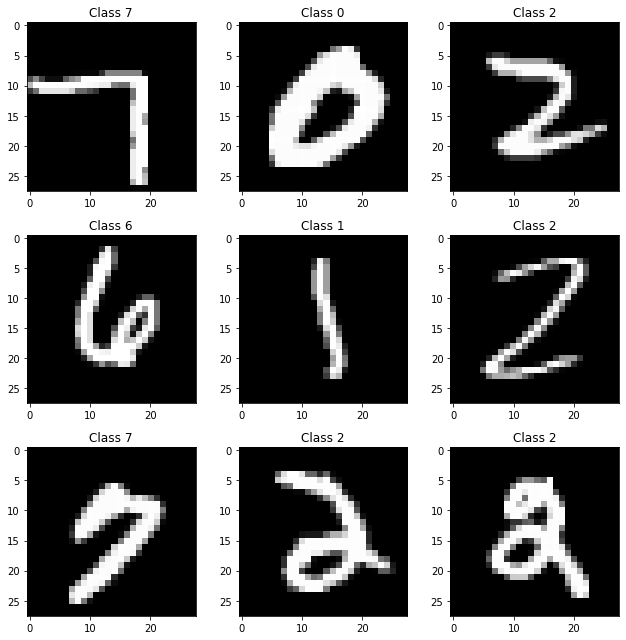

In [5]:
plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))
    
plt.tight_layout()

Imagenes como matriz

In [6]:
# just a little function for pretty printing a matrix
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

# now print!        
matprint(X_train[num])

0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  
0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  
0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  
0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  
0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  
0  0  0  0  0  0    0    0    0    0    0   72  152  152  112   92  253    0    0    0    0    0    0  0  0  0  0  0  
0  0  0  0  0  0    0    0    0    0  123  253  252  253  252  253  252    0    0    0    0    0    0  0  0  0  0  0  
0  0  0  0  0  0    0    0    0   52  253  254  233  254  253  254  253   82    0    0    0    0    0  0  0  0  0  0  
0  0  0  0  0  0    0    0    0  132  252  253  

Cada pixel de la imagen es una entrada de la red neuronal por lo que el tensor de entrada es de dimension (60000,784)

In [7]:
X_train = X_train.reshape(60000, 784) # reshape 60,000 28 x 28 matrices into 60,000 784-length vectors.
X_test = X_test.reshape(10000, 784)   # reshape 10,000 28 x 28 matrices into 10,000 784-length vectors.

X_train = X_train.astype('float32')   # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')

X_train /= 255                        # normalize each value for each pixel for the entire vector for each input
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


Para la clasificacion es necesario el one-hot format

In [0]:
nb_classes = 10 # number of unique digits

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

Construccion de la Red

In [10]:
# The Sequential model is a linear stack of layers and is very common.

model = Sequential()

RuntimeError: ignored

In [9]:
# The first hidden layer is a set of 512 nodes (artificial neurons).
# Each node will receive an element from each input vector and apply some weight and bias to it.

model.add(Dense(512, input_shape=(784,))) #(784,) is not a typo -- that represents a 784 length vector!

NameError: ignored

In [0]:
# An "activation" is a non-linear function applied to the output of the layer above.
# It checks the new value of the node, and decides whether that artifical neuron has fired.
# The Rectified Linear Unit (ReLU) converts all negative inputs to nodes in the next layer to be zero.
# Those inputs are then not considered to be fired.
# Positive values of a node are unchanged.

model.add(Activation('relu'))

In [0]:
# Dropout zeroes a selection of random outputs (i.e., disables their activation)
# Dropout helps protect the model from memorizing or "overfitting" the training data.
model.add(Dropout(0.2))

Adicionando una capa

In [0]:
# The second hidden layer appears identical to our first layer.
# However, instead of each of the 512-node receiving 784-inputs from the input image data,
# they receive 512 inputs from the output of the first 512-node layer.

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

Capa de salida

In [11]:
# The final layer of 10 neurons in fully-connected to the previous 512-node layer.
# The final layer of a FCN should be equal to the number of desired classes (10 in this case).
model.add(Dense(10))

NameError: ignored

In [0]:
# The "softmax" activation represents a probability distribution over K different possible outcomes.
# Its values are all non-negative and sum to 1.

model.add(Activation('softmax'))

In [0]:
# Summarize the built model

model.summary()

In [0]:
# Let's use the Adam optimizer for learning
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Entrenando el modelo

In [0]:
model.fit(X_train, Y_train,
          batch_size=128, epochs=5,
          verbose=1)

Evaluando el modelo

In [0]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Verificando la salida

In [0]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = model.predict_classes(X_test)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]

incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

In [0]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.tight_layout()
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    
plt.tight_layout()